### 预测A侧脱硝效率

In [1]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from time import time
import datetime
from sklearn.model_selection import KFold
import scipy.stats as sci
from sklearn.model_selection import cross_val_score as CVS
import pickle

In [2]:
data = pd.read_csv(r"E:\Users\HUAWEI\Desktop\sklearn-learn data\脱硝效率数据集\A.csv",encoding='gb2312')
data.head()

,X1,X2,X3,X4,X5,Y
0,26.02,654174.07,45.40,0.29,4.45,79.00
1,24.85,654182.89,42.05,0.26,4.50,80.94
2,24.05,654192.22,42.47,0.17,4.70,82.03
3,25.10,654201.46,43.29,0.11,4.65,81.58
4,21.32,654210.85,42.08,0.23,4.59,84.22


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2974 non-null   float64
 1   X2      2975 non-null   float64
 2   X3      2975 non-null   float64
 3   X4      2970 non-null   float64
 4   X5      2972 non-null   float64
 5   Y       2974 non-null   float64
dtypes: float64(6)
memory usage: 139.6 KB


In [4]:
data.columns = ["x1","x2","x3","x4","x5","y"]

In [5]:
data.head()

,x1,x2,x3,x4,x5,y
0,26.02,654174.07,45.40,0.29,4.45,79.00
1,24.85,654182.89,42.05,0.26,4.50,80.94
2,24.05,654192.22,42.47,0.17,4.70,82.03
3,25.10,654201.46,43.29,0.11,4.65,81.58
4,21.32,654210.85,42.08,0.23,4.59,84.22


In [6]:
data.dropna(axis=0,inplace=True)  #axis=0对行进行修改，axis=0对列进行修改，inplace=True为对原来的数据进行修改

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2960 entries, 0 to 2975
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2960 non-null   float64
 1   x2      2960 non-null   float64
 2   x3      2960 non-null   float64
 3   x4      2960 non-null   float64
 4   x5      2960 non-null   float64
 5   y       2960 non-null   float64
dtypes: float64(6)
memory usage: 161.9 KB


In [8]:
data.head()

,x1,x2,x3,x4,x5,y
0,26.02,654174.07,45.40,0.29,4.45,79.00
1,24.85,654182.89,42.05,0.26,4.50,80.94
2,24.05,654192.22,42.47,0.17,4.70,82.03
3,25.10,654201.46,43.29,0.11,4.65,81.58
4,21.32,654210.85,42.08,0.23,4.59,84.22


In [9]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=666)

In [12]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
Xtrain2 = standardScaler.fit_transform(Xtrain)
Xtest2 = standardScaler.fit_transform(Xtest)

In [13]:
times = time()
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVR(kernel=kernel).fit(Xtrain2,Ytrain)
    result = clf.predict(Xtest2)
    score = clf.score(Xtest2,Ytest)
    print("%s's testing accuracy %f"%(kernel,score))
    print(datetime.datetime.utcfromtimestamp(time()-times).strftime("%M:%S:%f"))

linear's testing accuracy 0.729260
00:00:201463
poly's testing accuracy 0.334142
00:00:506681
rbf's testing accuracy 0.751426
00:00:718083
sigmoid's testing accuracy -100.797843
00:00:992346


### 选择rbf

In [14]:
import matplotlib.pyplot as plt

under C 0.010000,testing accuracy is 0.422799
under C 2.641053,testing accuracy is 0.769225
under C 5.272105,testing accuracy is 0.779324
under C 7.903158,testing accuracy is 0.784589
under C 10.534211,testing accuracy is 0.787902
under C 13.165263,testing accuracy is 0.787915
under C 15.796316,testing accuracy is 0.787616
under C 18.427368,testing accuracy is 0.786494
under C 21.058421,testing accuracy is 0.786667
under C 23.689474,testing accuracy is 0.787023
under C 26.320526,testing accuracy is 0.787191
under C 28.951579,testing accuracy is 0.787453
under C 31.582632,testing accuracy is 0.787451
under C 34.213684,testing accuracy is 0.787281
under C 36.844737,testing accuracy is 0.787367
under C 39.475789,testing accuracy is 0.787094
under C 42.106842,testing accuracy is 0.787019
under C 44.737895,testing accuracy is 0.787168
under C 47.368947,testing accuracy is 0.787194
under C 50.000000,testing accuracy is 0.787224
0.7879150512914006 13.165263157894737


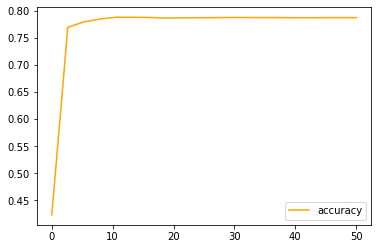

00:09:589319


In [15]:
times = time()
C_range = np.linspace(0.01,50,20)
scoreall = []
for C in C_range:
    clf = SVR(kernel="rbf",C=C).fit(Xtrain2,Ytrain)
    result = clf.predict(Xtest2)
    score = clf.score(Xtest2,Ytest)
    scoreall.append(score)
    print("under C %f,testing accuracy is %f"%(C,score))
print(max(scoreall),C_range[scoreall.index(max(scoreall))])
plt.figure()
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend()
plt.show()
print(datetime.datetime.utcfromtimestamp(time()-times).strftime("%M:%S:%f"))

In [16]:
time0 = time()
params = {'gamma':np.arange(1,10,1)}
cv = KFold(n_splits=5, shuffle = True, random_state=666) 
clf = SVR(kernel="rbf",C=13.165263157894737)
GV = GridSearchCV(clf,params,cv=cv)
GV.fit(Xtrain2,Ytrain)
print(GV.best_params_,GV.best_score_)
print(datetime.datetime.utcfromtimestamp(time()-time0).strftime("%M:%S:%f"))

{'gamma': 1} 0.7804125189011472
00:23:550013


In [17]:
 def test(x): # 代入优化后的C、Gamma对测试集进行检验
        # 读取测试集数据
        C,G = x
        data = np.array(Xtrain2)
        dataTarget = np.array(Ytrain)
        data_test = np.array(Xtest2) # 测试集的特征数据（归一化）
        dataTarget_test = np.array(Ytest) # 测试集的标签数据
        svr = SVR(C=C, kernel='rbf', gamma=G).fit(data, dataTarget) # 创建分类器对象并用训练集的数据拟合分类器模型
        dataTarget_predict = svr.predict(data_test) # 采用训练好的分类器对象对测试集数据进行预测
        return  np.sum((dataTarget_test - dataTarget_predict )**2)/len(dataTarget_test)

In [18]:
time0 = time()
from sko.PSO import PSO
pso = PSO(func=test, dim=2, pop=100, max_iter=3000, lb=[1, 2**(-20)], ub=[50, 1], w=0.5, c1=2, c2=2)
fitness = pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)
print(datetime.datetime.utcfromtimestamp(time()-time0).strftime("%M:%S:%f"))

best_x is  [13.09330272  0.31842192] best_y is 1.9030861242869104
06:34:207155


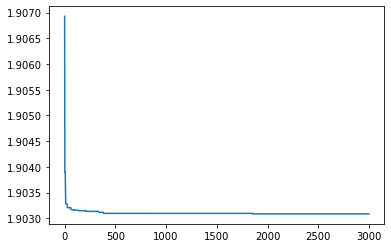

In [19]:
import matplotlib.pyplot as plt

plt.plot(pso.gbest_y_hist)
plt.show()

In [20]:
svr = SVR(kernel="rbf"
         ,C = 13.09330272 
         ,gamma=0.31842192
         ).fit(Xtrain2,Ytrain)

In [21]:
ypred = svr.predict(Xtest2)

In [22]:
from sklearn.metrics import mean_squared_error as MSE, r2_score 
MSE(Ytest,ypred)

1.903151415974349

In [23]:
r2_score(Ytest,ypred)

0.7911728290517834

In [24]:
#保存模型
pickle.dump(svr,open("svrpredict.dat","wb"))

In [21]:
def plot_learning_curve(estimator,title, X, y,
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                        ):

    from sklearn.model_selection import learning_curve 
    import matplotlib.pyplot as plt
    import numpy as np

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                           ,shuffle=True
                                                           ,cv=cv
                                                           ,random_state=420
                                                           ,n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca() 
    else:
        ax = plt.figure() 
    ax.set_title(title) 
    if ylim is not None:
        ax.set_ylim(*ylim) 
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score") 
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",label="Training score") 
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",label="Test score") 
    ax.legend(loc="best")
    return ax

In [22]:
cv = KFold(n_splits=5, shuffle = True, random_state=666) 

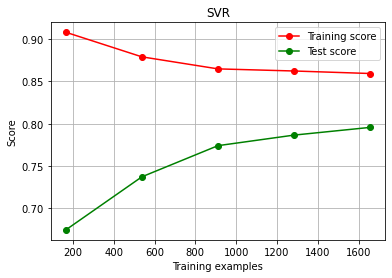

In [23]:
plot_learning_curve(SVR(kernel="rbf"
                       ,gamma = "auto"
                       ,C = 13.165263157894737)
                        ,"SVR",Xtrain2,Ytrain,ax=None,cv=cv)
plt.show()

In [24]:
for i in [Ytest]:
    i.index = range(i.shape[0])

In [25]:
datanew = pd.concat([pd.DataFrame(Ytest),pd.DataFrame(ypred)],axis=1)

In [26]:
datanew.head()

,y,0
0,80.67,81.405299
1,80.74,80.465965
2,79.65,79.846991
3,83.00,82.089326
4,80.21,79.369374


In [27]:
datanew.columns = ["Ytest","ypred"]

In [28]:
datanew.head()

,Ytest,ypred
0,80.67,81.405299
1,80.74,80.465965
2,79.65,79.846991
3,83.00,82.089326
4,80.21,79.369374


In [29]:
import matplotlib.pyplot as plot
import matplotlib as mpl

In [30]:
X3 = datanew.iloc[:,0]

In [31]:
y3 = datanew.iloc[:,1]

In [32]:
parameter = np.polyfit(X3,y3,1)

In [33]:
p = np.poly1d(parameter)

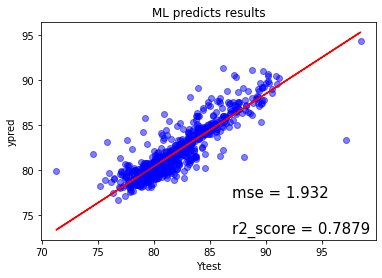

In [34]:
plt.figure()
plt.scatter(X3,y3,color="blue",alpha=0.5)
plt.plot(X3,p(X3),color="red")
plt.xlabel("Ytest")
plt.ylabel("ypred")
plt.title("ML predicts results")
t = "mse = 1.932"
plt.text(87,77,t,fontsize=15)
t1 = "r2_score = 0.7879"
plt.text(87,73,t1,fontsize=15)
plt.show()

### 预测

In [36]:
data1 = pd.read_csv(r"E:\Users\HUAWEI\Desktop\B.csv",encoding='gb2312')
data1.head()

,22#1锅炉B侧出口NOx浓度,24#1锅炉B侧喷氨总量,25#1锅炉烟囱NOx浓度,27#1锅炉B侧氨逃逸,31#1锅炉B侧SCR进口氧量,29#1锅炉B侧脱硝效率
0,32.11,701125.01,45.40,0.37,4.35,79.08
1,26.70,701134.99,42.05,0.42,4.58,82.82
2,25.65,701145.91,42.47,0.32,4.85,83.94
3,28.25,701156.22,43.29,0.04,4.60,82.16
4,29.32,701166.03,42.08,0.15,4.58,81.60


In [39]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 6 columns):
22#1锅炉B侧出口NOx浓度    2975 non-null float64
24#1锅炉B侧喷氨总量       2973 non-null float64
25#1锅炉烟囱NOx浓度      2975 non-null float64
27#1锅炉B侧氨逃逸        2974 non-null float64
31#1锅炉B侧SCR进口氧量    2973 non-null float64
29#1锅炉B侧脱硝效率       2974 non-null float64
dtypes: float64(6)
memory usage: 139.6 KB


In [49]:
data1.columns = ["x1","x2","x3","x4","x5","y"]

In [50]:
data1.dropna(axis=0,inplace=True)  #axis=0对行进行修改，axis=0对列进行修改，inplace=True为对原来的数据进行修改

In [57]:
X1 = data1.iloc[:,0:-1]
y1 = data1.iloc[:,-1]

In [58]:
X1.shape

(2964, 5)

In [59]:
y1.shape

(2964,)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
Xtrain1,Xtest1,Ytrain1,Ytest1 = train_test_split(X1,y1,test_size=0.3,random_state=666)

In [62]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
Xtrain3 = standardScaler.fit_transform(Xtrain1)
Xtest3 = standardScaler.fit_transform(Xtest1)

In [64]:
times = time()
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVR(kernel=kernel).fit(Xtrain3,Ytrain1)
    result = clf.predict(Xtest3)
    score = clf.score(Xtest3,Ytest1)
    print("%s's testing accuracy %f"%(kernel,score))
    print(datetime.datetime.utcfromtimestamp(time()-times).strftime("%M:%S:%f"))

linear's testing accuracy 0.815523
00:00:258786
poly's testing accuracy 0.736260
00:01:092189
rbf's testing accuracy 0.846168
00:01:547974
sigmoid's testing accuracy -68.576615
00:02:125215


under C 0.010000,testing accuracy is 0.470939
under C 5.272632,testing accuracy is 0.875474
under C 10.535263,testing accuracy is 0.878838
under C 15.797895,testing accuracy is 0.880647
under C 21.060526,testing accuracy is 0.881420
under C 26.323158,testing accuracy is 0.881901
under C 31.585789,testing accuracy is 0.882667
under C 36.848421,testing accuracy is 0.882681
under C 42.111053,testing accuracy is 0.882783
under C 47.373684,testing accuracy is 0.883089
under C 52.636316,testing accuracy is 0.883104
under C 57.898947,testing accuracy is 0.882558
under C 63.161579,testing accuracy is 0.881930
under C 68.424211,testing accuracy is 0.881435
under C 73.686842,testing accuracy is 0.880916
under C 78.949474,testing accuracy is 0.880349
under C 84.212105,testing accuracy is 0.879815
under C 89.474737,testing accuracy is 0.879423
under C 94.737368,testing accuracy is 0.878760
under C 100.000000,testing accuracy is 0.878020
0.8831035201027105 52.63631578947368


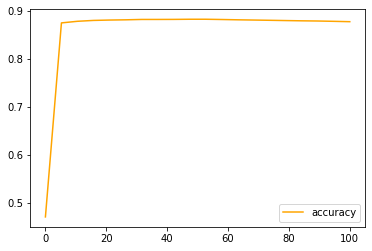

00:25:788918


In [66]:
import matplotlib.pyplot as plt
times = time()
C_range = np.linspace(0.01,100,20)
scoreall = []
for C in C_range:
    clf = SVR(kernel="rbf",C=C).fit(Xtrain3,Ytrain1)
    result = clf.predict(Xtest3)
    score = clf.score(Xtest3,Ytest1)
    scoreall.append(score)
    print("under C %f,testing accuracy is %f"%(C,score))
print(max(scoreall),C_range[scoreall.index(max(scoreall))])
plt.figure()
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend()
plt.show()
print(datetime.datetime.utcfromtimestamp(time()-times).strftime("%M:%S:%f"))

In [68]:
time0 = time()
params = {'gamma':np.arange(1,10,1)}
cv = KFold(n_splits=5, shuffle = True, random_state=666) 
clf = SVR(kernel="rbf",C=52.63631578947368)
GV = GridSearchCV(clf,params,cv=cv)
GV.fit(Xtrain3,Ytrain1)
print(GV.best_params_,GV.best_score_)
print(datetime.datetime.utcfromtimestamp(time()-time0).strftime("%M:%S:%f"))

{'gamma': 2} 0.5024238233448891
01:24:491540


In [69]:
svr = SVR(kernel="rbf"
         ,C = 52.63631578947368
         ,gamma="auto"
         ).fit(Xtrain3,Ytrain1)

In [70]:
ypred = svr.predict(Xtest3)

In [71]:
from sklearn.metrics import mean_squared_error as MSE, r2_score 
MSE(Ytest1,ypred)

1.5494955682306744

In [72]:
r2_score(Ytest1,ypred)

0.8831035201027106

In [73]:
def plot_learning_curve(estimator,title, X, y,
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                        ):

    from sklearn.model_selection import learning_curve 
    import matplotlib.pyplot as plt
    import numpy as np

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                           ,shuffle=True
                                                           ,cv=cv
                                                           ,random_state=420
                                                           ,n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca() 
    else:
        ax = plt.figure() 
    ax.set_title(title) 
    if ylim is not None:
        ax.set_ylim(*ylim) 
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score") 
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",label="Training score") 
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",label="Test score") 
    ax.legend(loc="best")
    return ax

In [74]:
cv = KFold(n_splits=5, shuffle = True, random_state=666) 

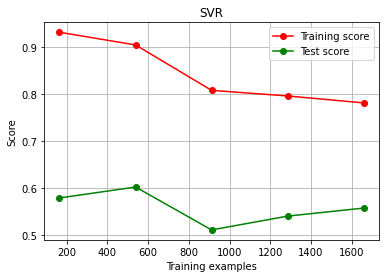

In [75]:
plot_learning_curve(SVR(kernel="rbf"
                       ,gamma = "auto"
                       ,C = 52.63631578947368)
                        ,"SVR",Xtrain3,Ytrain1,ax=None,cv=cv)
plt.show()

In [76]:
for i in [Ytest]:
    i.index = range(i.shape[0])

In [77]:
datanew1 = pd.concat([pd.DataFrame(Ytest1),pd.DataFrame(ypred)],axis=1)

In [78]:
datanew1.columns = ["Ytest1","ypred"]

In [81]:
import matplotlib.pyplot as plot
import matplotlib as mpl
X3 = datanew1.iloc[:,0]
y3 = datanew1.iloc[:,1]

In [83]:
parameter = np.polyfit(X3,y3,1)

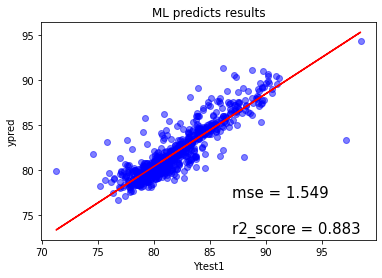

In [84]:
p = np.poly1d(parameter)
plt.figure()
plt.scatter(X3,y3,color="blue",alpha=0.5)
plt.plot(X3,p(X3),color="red")
plt.xlabel("Ytest1")
plt.ylabel("ypred")
plt.title("ML predicts results")
t = "mse = 1.549"
plt.text(87,77,t,fontsize=15)
t1 = "r2_score = 0.883"
plt.text(87,73,t1,fontsize=15)
plt.show()